In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **Title : Identifying Customer Segmentation for Business Optimization**

Tujuan / Objective : 
- Mengidentifikasi pengelompokan customer berdasarkan analisis LRFM (Length, Recency, Frequency, Monetary) untuk mengklasifikasikan menjadi segmen strategis untuk mendukung keputusan bisnis.
- Memberikan insight yang actionable untuk setiap segmen agar dapat menyusun strategi penumbuhan berbasis behaviour pelanggan.

## **Business Acknowledge**

## **Context**

Sebuah perusahaan yang bergerak di bidang penjualan perangkat lunak (SaaS / Software as a Service) ingin mengetahui gambaran umum tentang data pelanggan yang menggunakan jasa dan produk mereka. Terdapat sebuah database yang menunjukkan detail dari data barang (produk software), data tanggal order, data pelanggan, data lokasi (negara, kota, region), data industri, data segmen, dan data penjualan (sales, quantity, diskon, profit). Perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk mempertahankan pelanggan dan menambah jumlah pelanggan melalui peningkatan kualitas pelayanan jasa & produk bisnis (customer needs - customer services).

Bisnis Saas merupakan sistem penjualan perangkat lunak berupa produk digital yang dapat membantu dalam berbagai aspek. Sistem penjualan yang digunakan adalah B2b (Business to Business) yang berarti hubungan penjualan antara perusahaan dengan perusahaan. Tipe bisnis B2b ini cenderung menargetkan penjualan dengan memperhatikan aspek pada relasi jangka panjang yang biasanya melibatkan kontrak dan penyesuaian khusus setiap pengguna layanan (customer). Hal ini memunculkan keberagaman penjualan yang cenderung sangat bervariatif dan sulit untuk melihat pelanggan mana yang menghasilkan keuntungan (profit) yang paling tinggi. Untuk melihat kestabilan perusahaan perlu memperhatikan aspek pelanggan berdasarkan segmentasinya yang akan memberikan gambaran terhadap kebiasaan (behaviour) pelanggan sehingga bisa dilakukan penanganan untuk masing - masing tipenya menggunakan bantuan LRFM. 

## **Database Information/Introduction**
Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah mengenali informasi dasar atau umum dari data agar dapat mengetahui keterkaitan data terhadap tahunnya. 

Data tahun transaksi dari 2020 - 2023 dan analisis diasumsikan diadakan pada tahun 2024 bulan Januari 

Sumber Database: https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales

Database yang dimiliki mempunyai 19 tabel, yaitu:

Transaksi:
- ID Baris: Kode unik untuk setiap transaksi.
- ID Pesanan: Kode unik untuk setiap pesanan.
- Tanggal Pesanan: Tanggal pemesanan.
- Kunci Tanggal: Kode dari tanggal pemesanan (YYYYMMDD).
- Nama Kontak: Nama orang yang melakukan pemesanan.

Lokasi:
- Negara: Negara tempat pemesanan dilakukan.
- Kota: Kota tempat pemesanan dilakukan.
- Wilayah: Wilayah tempat pemesanan dilakukan.
- Subwilayah: Subwilayah tempat pemesanan dilakukan.

Pelanggan:
- Pelanggan: Nama perusahaan yang melakukan pemesanan.
- ID Pelanggan: Kode unik untuk setiap pelanggan.
- Industri: Industri tempat pelanggan berada.
- Segmen: Segmen pelanggan (UKM, Strategis, Perusahaan, dll.)

Produk:
- Produk: Produk yang dipesan.
- Lisensi: Kunci lisensi untuk produk tersebut.
- Penjualan: Total penjualan untuk transaksi tersebut.
- Kuantitas: Jumlah total barang dalam transaksi.
- Diskon: Diskon yang diterapkan pada transaksi.
- Keuntungan: Keuntungan dari transaksi.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.


## **Data Wrangling/Cleaning**
Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada tabel penjualan. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistik-nya.

In [3]:
# Melihat data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Terdapat 19 kolom dengan 9994 baris dengan tipe data yang berbeda-beda. Perlu dilakukan pengecekan lebih lanjut terhadap kolom yang ingin dianalisis dan pembersihan data. Beberapa langkah yang harus diperhatikan adalah pengecekan tipe data, penghapusan data outlier, pengecekan data duplikat dan data kosong dan lainnya.

### **Choosing Columns to Use / Delete Unused Columns**

Langkah awal dalam melakukan data manipulation adalah memilih kolom / tabel yang akan digunakan dalam analisis sehingga informasi yang cenderung tidak digunakan atau tidak berguna dalam analisis tidak mengganggu fokus dari tujuannya.

In [4]:
df.drop(['Row ID', 'Date Key', 'Contact Name'], axis=1, inplace = True)

df

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Beberapa kolom yang tidak memiliki akan digunakan atau tidak membantu dalam melihat data menjadi lebih baik sudah dihapus. Nantinya akan kita lakukan pengecekan ulang terhadap tabel mana yang akan kita pakai dalam analisis, namun sebelumnya kita perlu melakukan pengecekan data wrangling lainnya sebelum menentukan data mana yang akan kita pakai.

In [5]:
df.head()

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **Checking Missing Value**

Pengecekan untuk masing - masing data melihat kekosongan data dalam baris maupun kolom.

In [6]:
# Mengidentifikasi/menghitung jumlah nilai yang kosong

total_mv = df.isnull().sum().sum()
total_mv_pct = total_mv / df.size

print("Total values: ", df.size)
print(f"Total Missing Values on Dataset : {total_mv} ({total_mv_pct:.2%})")

# Periksa nilai yang kosong pada setiap kolom
df_missing = pd.DataFrame(df.isnull().sum()).rename(columns={0: 'Count of Missing Values'})
df_missing['Percentage of Missing']=100 * round(df_missing['Count of Missing Values'] / len(df),4)
df_missing['Percentage of Missing'] = df_missing['Percentage of Missing'].astype(str) + '%'

df_missing

Total values:  159904
Total Missing Values on Dataset : 0 (0.00%)


,Count of Missing Values,Percentage of Missing
Order ID,0,0.0%
Order Date,0,0.0%
Country,0,0.0%
City,0,0.0%
Region,0,0.0%
Subregion,0,0.0%
Customer,0,0.0%
Customer ID,0,0.0%
Industry,0,0.0%
Segment,0,0.0%


Terlihat bahwa untuk masing - masing kolom maupun baris tidak memiliki nilai yang kosong, sehingga tidak perlu dilakukan pengisian nilai yang kosong.

#### **Missing Value in Row**

In [7]:
#Mengidentifikasi/menghitung jumlah baris yang kosong

total_mv = df.isnull().any(axis=1).sum()
total_mv_pct = total_mv / df.shape[0]

print("Total rows: ", df.shape[0])
print(f"Total Rows that Have Missing Values on Dataset : {total_mv} ({total_mv_pct:.2%})")

Total rows:  9994
Total Rows that Have Missing Values on Dataset : 0 (0.00%)


#### **Missing Value in Column**

In [8]:
#Mengindentifikasi/menghitung kolom yang memiliki nilai kosong dalam persentase
percentage_missing_columns = (df.isnull().sum() / len(df)) * 100
print(f"Persentase nilai yang hilang per kolom:\n{percentage_missing_columns}")


Persentase nilai yang hilang per kolom:
Order ID       0.0
Order Date     0.0
Country        0.0
City           0.0
Region         0.0
Subregion      0.0
Customer       0.0
Customer ID    0.0
Industry       0.0
Segment        0.0
Product        0.0
License        0.0
Sales          0.0
Quantity       0.0
Discount       0.0
Profit         0.0
dtype: float64


Jika ada nilai yang kosong, bisa dilakukan penghapusan atau pengisian nilai menggunakan metode yang sesuai
Untuk kolom yang kosong, ada beberapa panduan untuk mengisi nilai berikut : 

- Kosong > 90% : Kolom dihapus
- Kosong < 5% : Baris Aman Untuk Dihapus
-   5% < Kosong > 20% : Dipertahankan dan dianalisis 
-   Kosong > 40 - 50% : Kecuali kolom penting, kolom dihapus 
-   Kosong:

    Asumsi MAR : Missing At Random 

    Asumsi MCAR : Missing Completely At Random
    
    Asumsi MNAR : Missing Not At Random

### **Checking Data Type**

Langkah selanjutnya adalah melakukan pengecekan terhadap tipe data setiap kolom dan melakukan perbaikan jika diperlukan. Hal ini penting untuk memastikan bahwa analisis yang dilakukan sesuai dengan tipe data yang ada.

In [9]:
# Melihat data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     9994 non-null   object 
 1   Order Date   9994 non-null   object 
 2   Country      9994 non-null   object 
 3   City         9994 non-null   object 
 4   Region       9994 non-null   object 
 5   Subregion    9994 non-null   object 
 6   Customer     9994 non-null   object 
 7   Customer ID  9994 non-null   int64  
 8   Industry     9994 non-null   object 
 9   Segment      9994 non-null   object 
 10  Product      9994 non-null   object 
 11  License      9994 non-null   object 
 12  Sales        9994 non-null   float64
 13  Quantity     9994 non-null   int64  
 14  Discount     9994 non-null   float64
 15  Profit       9994 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.2+ MB


Proses berikutnya merupakan mengubah tipe data pada fitur yang salah, dalam hal ini fitur ``order date`` memiliki tipe data object yang seharusnya merupakan tipe data datetime.

In [10]:
# Mengubah tipe data tanggal contoh kolom 'Order Date' menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Mengubah tipe data customer ID menjadi object karena kolom tersebut menunjukkan identitas unik dan bukan sebuah angka yang akan dilakukan operasi matematika
df['Customer ID'] = df['Customer ID'].astype(str)

# Pengecekan kembali tipe data setelah perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Country      9994 non-null   object        
 3   City         9994 non-null   object        
 4   Region       9994 non-null   object        
 5   Subregion    9994 non-null   object        
 6   Customer     9994 non-null   object        
 7   Customer ID  9994 non-null   object        
 8   Industry     9994 non-null   object        
 9   Segment      9994 non-null   object        
 10  Product      9994 non-null   object        
 11  License      9994 non-null   object        
 12  Sales        9994 non-null   float64       
 13  Quantity     9994 non-null   int64         
 14  Discount     9994 non-null   float64       
 15  Profit       9994 non-null   float64       
dtypes: dat

### **Checking Inconsistent Data**

Langkah selanjutnya adalah melakukan pengecekan terhadap konsistensi data setiap kolom dan melakukan perbaikan jika diperlukan. Hal ini penting untuk memastikan bahwa setiap data memiliki format penulisan yang sama.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Country      9994 non-null   object        
 3   City         9994 non-null   object        
 4   Region       9994 non-null   object        
 5   Subregion    9994 non-null   object        
 6   Customer     9994 non-null   object        
 7   Customer ID  9994 non-null   object        
 8   Industry     9994 non-null   object        
 9   Segment      9994 non-null   object        
 10  Product      9994 non-null   object        
 11  License      9994 non-null   object        
 12  Sales        9994 non-null   float64       
 13  Quantity     9994 non-null   int64         
 14  Discount     9994 non-null   float64       
 15  Profit       9994 non-null   float64       
dtypes: dat

In [92]:
df['Order ID'].unique()

df_unique = df['Order ID'].nunique()

print(df['Order ID'].unique())
print(f'Jumlah data unik : {df_unique} ')

['EMEA-2022-152156' 'AMER-2022-138688' 'EMEA-2021-108966' ...
 'EMEA-2020-110422' 'AMER-2023-121258' 'AMER-2023-119914']
Jumlah data unik : 5009 


In [12]:
df['Order Date'].unique()

df_unique = df['Order Date'].nunique()

print(df['Order Date'].unique())
print(f'Jumlah data unik : {df_unique} ')

<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]
Jumlah data unik : 1237 


Pada setiap data pada `order date` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `1237` buah

In [13]:
df['Country'].unique()

df_unique = df['Country'].nunique()

print(df['Country'].unique())
print(f'Jumlah data unik : {df_unique} ')

['Ireland' 'United States' 'Germany' 'Sweden' 'Canada' 'Japan' 'Italy'
 'Turkey' 'Costa Rica' 'France' 'Australia' 'Luxembourg' 'Brazil'
 'Philippines' 'India' 'United Kingdom' 'Chile' 'Spain' 'South Africa'
 'Portugal' 'Colombia' 'Belgium' 'Russia' 'Netherlands' 'Mexico' 'Poland'
 'Singapore' 'New Zealand' 'Czech Republic' 'Saudi Arabia' 'Argentina'
 'South Korea' 'Finland' 'Israel' 'Norway' 'Ukraine'
 'United Arab Emirates' 'Greece' 'China' 'Austria' 'Indonesia' 'Egypt'
 'Denmark' 'Croatia' 'Taiwan' 'Qatar' 'Slovenia' 'Iceland']
Jumlah data unik : 48 


Pada setiap data pada `Country` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `48` buah

In [14]:
df['City'].unique()

df_unique = df['City'].nunique()

print(df['City'].unique())
print(f'Jumlah data unik : {df_unique} ')

['Dublin' 'New York City' 'Stuttgart' 'Stockholm' 'Toronto' 'Saitama'
 'Naples' 'Ankara' 'Los Angeles' 'San José' 'Paris' 'Istanbul' 'Tokyo'
 'Aichi' 'Wollongong' 'Hanover' 'Luxembourg' 'Salvador' 'Davao City'
 'Kolkata' 'London' 'Brighton' 'Sydney' 'Puente Alto' 'Madrid'
 'Rio de Janeiro' 'Cape Town' 'Lisboa' 'Uppsala' 'Bogotá' 'Brussels'
 'Moscow' 'Canberra' 'The Hague' 'Mexico City' 'Manila' 'Geelong'
 'Santiago' 'Aurora' 'Warsaw' 'Newark' 'Monterrey' 'Rome' 'Chicago'
 'Singapore' 'Wellington' 'Osaka' 'Melbourne' 'Prague' 'Riyadh' 'Raleigh'
 'Providence' 'Córdoba' 'Guadalajara' 'Oklahoma City' 'Puerto Vallarta'
 'São Paulo' 'Johannesburg' 'Cologne' 'Rochester' 'Seattle' 'Detroit'
 'Lafayette' 'Munich' 'St Petersburg' 'Buenos Aires' 'Mendoza' 'Leipzig'
 'Jacksonville' 'Long Beach' 'Chiba' 'Incheon' 'Helsinki' 'Dhahran'
 'Seoul' 'Dresden' 'Vancouver' 'Adelaide' 'Tel Aviv' 'Hordaland' 'Hamburg'
 'Henderson' 'Kyiv' 'Leicester' 'Malmö' 'Berlin' 'Mumbai' 'Cardiff'
 'Columbus' 'Fukuoka' 'B

Pada setiap data pada `City` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `262` buah

In [15]:
df['Region'].unique()

df_unique = df['Region'].nunique()

print(df['Region'].unique())
print(f'Jumlah data unik : {df_unique} ')

['EMEA' 'AMER' 'APJ']
Jumlah data unik : 3 


Pada setiap data pada `Region` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `3` buah

In [16]:
df['Subregion'].unique()

df_unique = df['Subregion'].nunique()

print(df['Subregion'].unique())
print(f'Jumlah data unik : {df_unique} ')


['UKIR' 'NAMER' 'EU-WEST' 'NOR' 'JAPN' 'EU' 'MEA' 'LATAM' 'ANZ' 'APAC'
 'IND' 'EU-EAST']
Jumlah data unik : 12 


Pada setiap data pada `Subregion` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `12` buah

In [17]:
df['Customer'].unique()

df_unique = df['Customer'].nunique()

print(df['Customer'].unique())
print(f'Jumlah data unik : {df_unique} ')

['Chevron' 'Phillips 66' 'Royal Dutch Shell' 'BNP Paribas' 'Engie'
 'Microsoft' 'Pfizer' 'Toyota Motor' 'Home Depot' 'Wells Fargo'
 'Carrefour' 'Costco Wholesale' 'McKesson' 'Siemens' 'Intel' 'Glencore'
 'Procter & Gamble' 'Banco Santander' 'Pemex' 'Samsung Electronics' 'Sony'
 'Morgan Stanley' 'Bank of America Corp.' 'Tesco' 'Aviva'
 'Mondelez International' 'Abbott Laboratories' 'Fannie Mae' 'Aetna'
 'Oracle' 'Nissan Motor' 'Tyson Foods' 'Verizon Communications' 'Itochu'
 'Daimler' 'Walgreens' 'Boeing' 'Valero Energy' 'Nestle'
 'Philip Morris International' 'Trafigura Group' 'Walmart' 'Cisco Systems'
 'Prudential Financial' 'Amazon' 'Gazprom' 'FedEx' 'Honda Motor'
 'CVS Health' 'General Motors' 'State Farm Insurance Cos.' 'Comcast'
 'AmerisourceBergen' 'Johnson & Johnson' 'HonHai Precision Industry'
 'American Express' 'J.P. Morgan Chase & Co.' 'Kroger' 'Volkswagen'
 'Merck' 'AT&T' 'Allstate' 'BMW' 'Humana' 'Sprint Nextel' 'Allianz'
 'United Parcel Service' 'Target' 'Airbus' 'Cigna' 

Pada setiap data pada `Customer` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `99` buah. Artinya terdapat total jumlah pelanggan dalam data ada 99 orang/perusahaan

In [18]:
df['Customer ID'].unique()

df_unique = df['Customer ID'].nunique()

print(df['Customer ID'].unique())
print(f'Jumlah data unik : {df_unique} ')

['1017' '1056' '1031' '1065' '1062' '1066' '1074' '1087' '1047' '1099'
 '1048' '1025' '1063' '1043' '1051' '1083' '1077' '1101' '1058' '1015'
 '1028' '1068' '1011' '1059' '1006' '1067' '1001' '1035' '1002' '1072'
 '1098' '1088' '1094' '1032' '1052' '1095' '1014' '1093' '1089' '1075'
 '1100' '1096' '1019' '1078' '1004' '1027' '1036' '1045' '1026' '1041'
 '1082' '1022' '1007' '1055' '1033' '1005' '1054' '1057' '1046' '1064'
 '1010' '1003' '1039' '1049' '1081' '1080' '1090' '1085' '1030' '1038'
 '1042' '1060' '1009' '1008' '1023' '1024' '1076' '1070' '1013' '1084'
 '1061' '1092' '1050' '1034' '1029' '1018' '1044' '1021' '1073' '1040'
 '1012' '1097' '1053' '1086' '1071' '1016' '1020' '1091' '1079']
Jumlah data unik : 99 


Pada setiap data pada `Customer ID` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `99` buah. 

In [19]:
df['Industry'].unique()

df_unique = df['Industry'].nunique()

print(df['Industry'].unique())
print(f'Jumlah data unik : {df_unique} ')

['Energy' 'Finance' 'Tech' 'Healthcare' 'Manufacturing' 'Retail'
 'Consumer Products' 'Misc' 'Transportation' 'Communications']
Jumlah data unik : 10 


Pada setiap data pada `Industry` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `10` buah

In [20]:
df['Segment'].unique()

df_unique = df['Segment'].nunique()

print(df['Segment'].unique())
print(f'Jumlah data unik : {df_unique} ')

['SMB' 'Strategic' 'Enterprise']
Jumlah data unik : 3 


Pada setiap data pada `Segment` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `3` buah

In [21]:
df['Product'].unique()

df_unique = df['Product'].nunique()

print(df['Product'].unique())
print(f'Jumlah data unik : {df_unique} ')

['Marketing Suite' 'FinanceHub' 'ContactMatcher' 'Marketing Suite - Gold'
 'SaaS Connector Pack' 'ChatBot Plugin' 'Site Analytics' 'OneView'
 'Support' 'Data Smasher' 'SaaS Connector Pack - Gold' 'Storage'
 'Big Ol Database' 'Alchemy']
Jumlah data unik : 14 


Pada setiap data pada `Product` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `14` buah

In [22]:
df['License'].unique()

df_unique = df['License'].nunique()

print(df['License'].unique())
print(f'Jumlah data unik : {df_unique} ')

['16GRM07R1K' 'QLIW57KZUV' 'JI6BVL70HQ' ... 'I5SVMI6M88' 'JHLW4P6LQ2'
 '3NTBV9B3PS']
Jumlah data unik : 9994 


Pada setiap data pada `License` sudah memiliki format penulisan yang sama sehingga tidak perlu dilakukan adanya perbaikan dengan jumlah data unik sebanyak `9994` buah

### **Checking Data Outlier**

Langkah selanjutnya adalah melakukan pengecekan terhadap data outler pada kolom numerik dan melakukan perbaikan jika diperlukan. Hal ini penting untuk memastikan bahwa setiap data memiliki distribusi yang tidak bias dan dapat mewakili populasi dengan baik, namun harus diperhatikan / ditinjau terlebih dahulu apakah data tersebut merupakan hal yang wajar dan bukan kondisi yang salah karena penulisan atau input data.

Menggunakan bantuan visualisasi Boxplot untuk melihat distribusi data 

#### **Data Outlier in Sales**

Melihat persebaran data dalam kolom sales menggunakan bantuan Boxplot

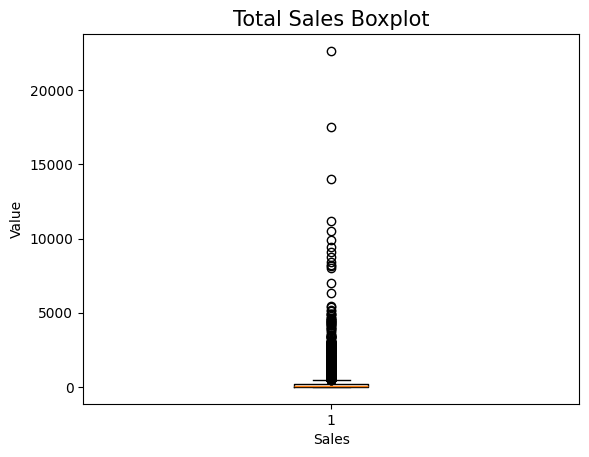

In [23]:
# boxplot dari sales
plt.boxplot(df['Sales'])
plt.title('Total Sales Boxplot', size = 15)
plt.xlabel('Sales')
plt.ylabel('Value')
plt.show()

**Insight** : Terdapat data outlier yang terlihat pada boxplot, namun tidak akan dihapus karena outlier masih relevan dengan analisis yang akan dilakukan. Outlier ini mungkin mencerminkan transaksi yang sangat besar, namun tetap penting untuk analisis bisnis.

#### **Data Outlier in Profit**

Melihat persebaran data dalam kolom profit menggunakan bantuan Boxplot

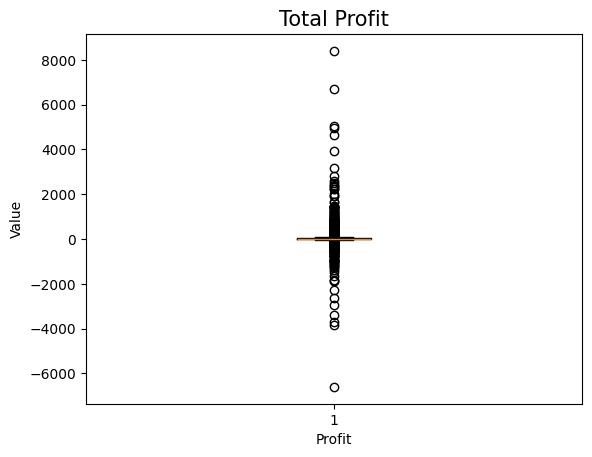

In [24]:
plt.boxplot(df['Profit'])
plt.title('Total Profit', size = 15)
plt.xlabel('Profit')
plt.ylabel('Value')
plt.show()

**Insight** : Terdapat data outlier yang terlihat pada boxplot, namun tidak akan dihapus karena outlier masih relevan dengan analisis yang akan dilakukan. Outlier ini mungkin mencerminkan transaksi yang sangat besar, namun tetap penting untuk analisis bisnis.

Berdasarkan visualisasi boxplot tersebut, dapat dilihat bahwa masing - masing kolom `Sales` dan `Profit` memiliki data yang diluar range IQR atau data outlier. Hal ini mungkin terjadi karena ada kemungkinan terjadinya transaksi dalam jumlah yang besar dikarenakan jenis transaksi penjualan SaaS ini menggunakan sistem B2b yang menghubungkan antara perusahaan dan perusahaan bukan perseorangan sehingga dapat dilakukan penjualan dalam jumlah yang besar.

### **Checking Duplicate Data**

Langkah selanjutnya adalah melakukan pengecekan terhadap duplikasi data pada setiap kolom dan melakukan perbaikan jika diperlukan. Hal ini penting untuk memastikan bahwa setiap data tidak mengalami kesalahan input dan akan memunculkan bias, namun harus diperhatikan / ditinjau terlebih dahulu apakah data tersebut merupakan memang merupakan kesalahan input pada salah satu kolom.

In [25]:
df_duplicate = df.duplicated().sum()

if df_duplicate == 0:
    print(f'Tidak ditemukan data duplikat pada tabel')
    print(f'Data duplikat sebanyak : {df_duplicate}')
else:
    print(f'Jumlah duplikat pada tabel sebanyak : {df_duplicate}')

Tidak ditemukan data duplikat pada tabel
Data duplikat sebanyak : 0


Dapat dilihat bahwa dalam dataset tidak memiliki data duplikat atau data yang sama persis, sehingga tidak perlu dilakukan penanganan/perbaikan lanjutan.

## **Exploratory Data Analysis (EDA)**
Proses selanjutnya adalah mengenal data lebih lanjut melalui hubungan antara masing - masing kolom sehingga dapat memahami lebih dalam sehingga mengetahui aspek mana yang perlu di analisis. Beberapa caranya adalah melihat dari distribusi maupun proporsi data.

#### **Data Distribution in Sales**

Melihat persebaran data dalam kolom sales menggunakan bantuan Histogram

In [26]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

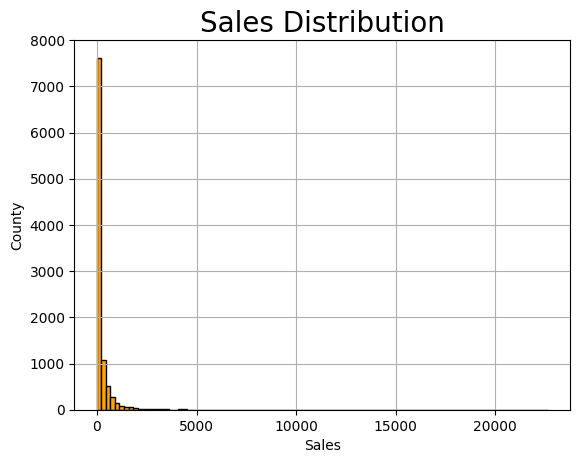

In [27]:
# Histogram untuk kolom Sales

plt.hist(df['Sales'], bins=100, color='orange', edgecolor='black')
plt.title('Sales Distribution', size=20)
plt.xlabel('Sales')
plt.ylabel('County')
plt.grid()
plt.show()


`Insight` : Terlihat distribusi penjualan (Sales) cenderung memiliki tumpang satu sisi (right skewed) sehingga dapat diketahui bahwa dalam data terdapat banyak variasi penjualan (sales kecil dalam jumlah banyak / sales besar dalam jumlah sedikit) yang dapat dipengaruhi oleh kebiasaan beli (behaviour) customer yang perlu dianalisis lebih lanjut. Perlu adanya analisis terkait aspek penjualan melalui LRFM analisis untuk memberikan gambaran lebih mendalam terkait pola beli customer.

#### **Data Distribution in Profit**

Melihat persebaran data dalam kolom profit menggunakan bantuan Histogram

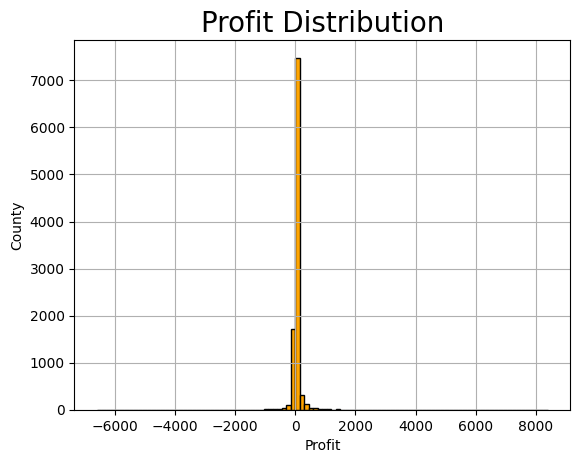

In [28]:
# Histogram untuk kolom Profit

plt.hist(df['Profit'], bins=100, color='orange', edgecolor='black')
plt.title('Profit Distribution', size=20)
plt.xlabel('Profit')
plt.ylabel('County')
plt.grid()
plt.show()

`Insight` : Dalam distribusi profit, dapat dilihat bahwa ada perbedaan antara distribusinya dibandingkan dengan Sales. Hal ini tentu saja bisa dipengaruhi oleh aspek lain yang mempengaruhinya, contohnya adalah diskon ataupun aspek yang diluar dari data.

#### **Data Comparison in Region**

Melihat persebaran data dalam kolom region menggunakan bantuan Barplot

C:\Users\ardin\AppData\Local\Temp\ipykernel_12828\1035439013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Region', data=df, palette=['green', 'yellow', 'orange'])


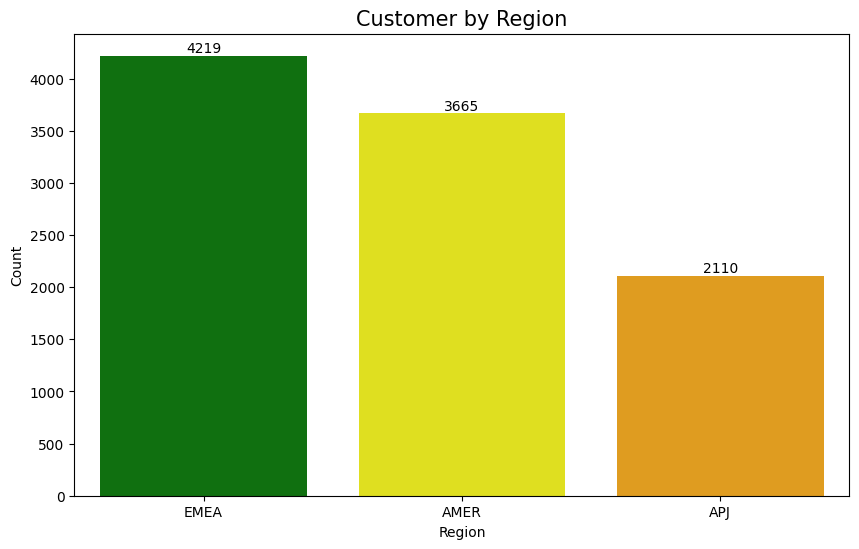

In [29]:
x = df['Region'].unique().tolist()
y = df['Region'].value_counts().values

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Region', data=df, palette=['green', 'yellow', 'orange'])
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom')

plt.title('Customer by Region', size = 15)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

`Insight` : Jika dikelompokkan berdasarkan regionnya, ditemukan bahwa pengguna yang paling banyak menggunakan layanan berasal dari EMEA atau Eropa dibandingkan dengan region lainnya. Jika dibandingkan secara angka, maka region EMEA memiliki 15,11% lebih banyak pelanggan dari region AMER dan 99,95% lebih banyak dari region APJ

#### **Data Comparison in Industry**

Melihat persebaran data dalam kolom Industry menggunakan bantuan Barplot

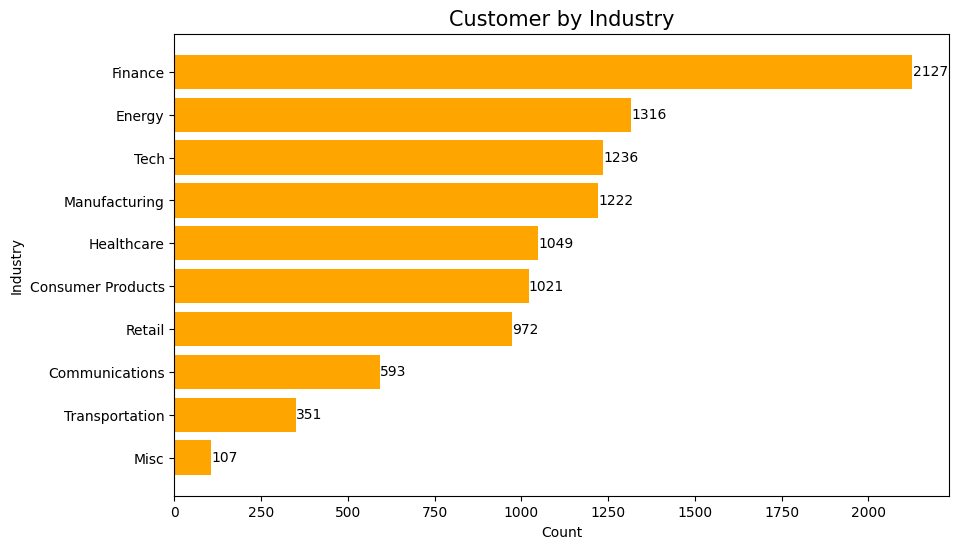

In [30]:
industry_counts = df['Industry'].value_counts().sort_values(ascending=True)
y = industry_counts.index.tolist()
x = industry_counts.values

plt.figure(figsize=(10,6))
bars = plt.barh(y, x, color='orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center')

plt.title('Customer by Industry', size = 15)
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

`Insight` : Berdasarkan industri yang menggunakan jasa layanan, dapat dilihat bahwa industri Finance memiliki nilai pengguna yang paling banyak dengan jumlah 2127 pengguna dan diurutan terakhir yaitu Misc dengan jumlah 107 pengguna. 

#### **Data Comparison in Segment**

Melihat persebaran data dalam kolom Segment menggunakan bantuan Barplot

C:\Users\ardin\AppData\Local\Temp\ipykernel_12828\2208371204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Segment', data=df, palette=['green', 'yellow', 'orange'])


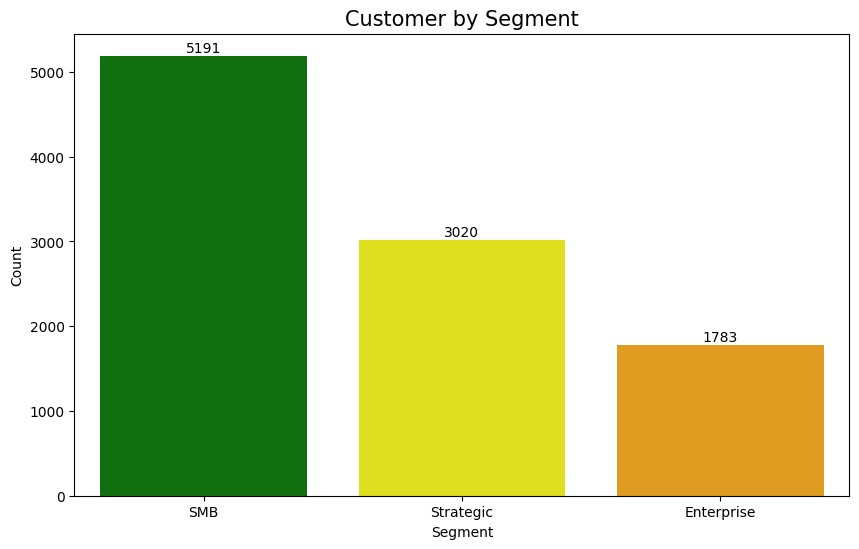

In [31]:
x = df['Segment'].unique().tolist()
y = df['Segment'].value_counts().values

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Segment', data=df, palette=['green', 'yellow', 'orange'])
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom')

plt.title('Customer by Segment', size = 15)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

`Insight` : Dari perbandingan berdasarkan segment bisnis yang menggunakan jasa layanan, dapat dilihat bahwa segment SMB memiliki angka yang signifikan jika dibandingkan dengan bagian lainnya. Hal ini menunjukkan bahwa dalam penjualan sudah sangat dipengaruhi oleh model bisnis Small, Middle Business (UMKM) yang nilai kontraknya cenderung kecil.

#### **Data Comparison in Product**

Melihat persebaran data dalam kolom Product menggunakan bantuan Barplot

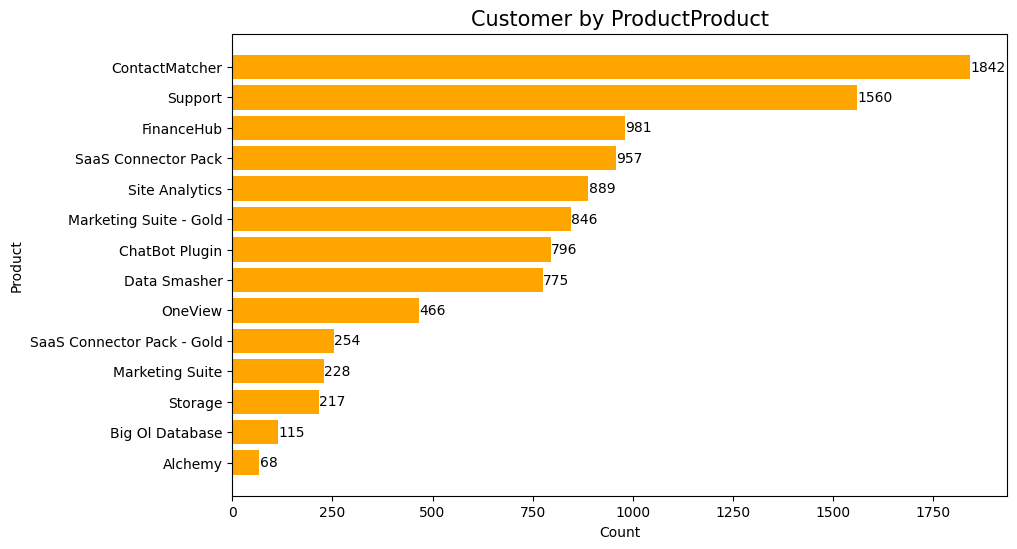

In [32]:
industry_counts = df['Product'].value_counts().sort_values(ascending=True)
y = industry_counts.index.tolist()
x = industry_counts.values

plt.figure(figsize=(10,6))
bars = plt.barh(y, x, color='orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center')

plt.title('Customer by ProductProduct', size = 15)
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

`Insight` : Berdasarkan jenis produk yang digunakan oleh pelanggan, jenis layanan yang paling signifikan digunakan adalah ContactMatcher, Support dan disusul dengan jenis layanan lainnya yang cenderung memiliki jumlah pengguna yang berdekatan. Hal ini dapat berkaitan dengan jenis industri yang menggunakan layanan dan kebutuhan mereka.

#### **Correlation Sales vs Profit**

Melihat hubungan antara sales dan profit menggunakan bantuan scatterplot

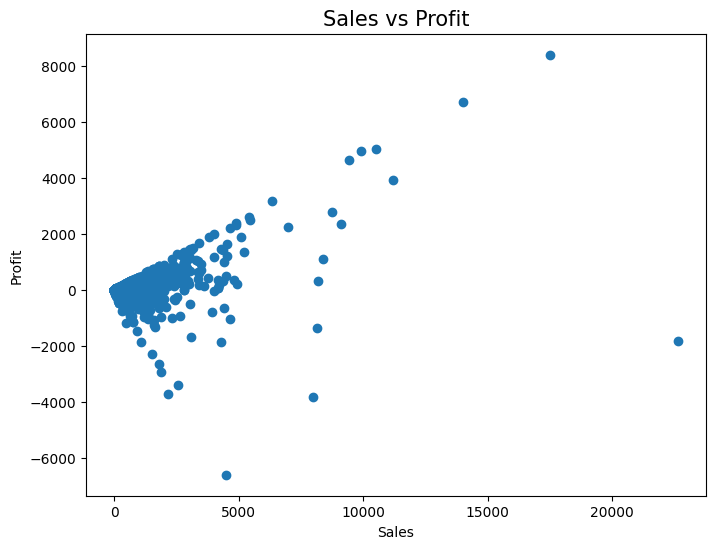

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df['Sales'], df['Profit'])
plt.title('Sales vs Profit', size = 15)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


`Insight` : Dapat dilihat berdasarkan hubungan Sales dan Profit melalui grafik/visualisasi diatas dapat dilihat bahwa sales tidak berbanding lurus terhadap profit. Hal ini bisa disebabkan oleh berbagai aspek yang mempengaruhi perhitungan profit, contohnya diskon, customer acquisition cost (CAC), strategi harga, biaya operasional dan support. Hal ini tentu saja akan sangat dianalisis karena keterbatasan dari data yang tersedia dimana hanya ada kolom diskon saja.

#### **Average Sales per Region**

Melihat perbandingan penjualan per Region menggunakan bantuan boxplot

C:\Users\ardin\AppData\Local\Temp\ipykernel_12828\1035652070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_sales.index, y=region_sales.values, palette=['green', 'yellow', 'orange'])


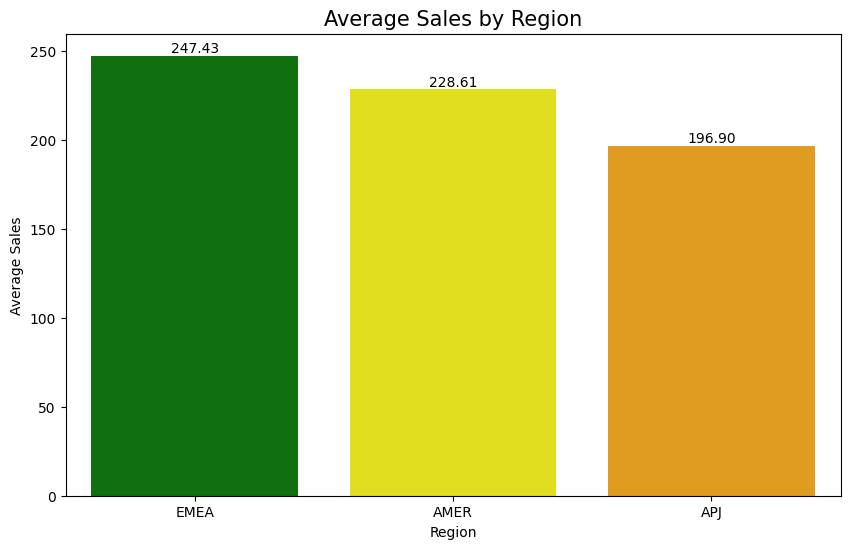

In [34]:
# Calculate average sales per region
region_sales = df.groupby('Region')['Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=region_sales.index, y=region_sales.values, palette=['green', 'yellow', 'orange'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{p.get_height():.2f}',
            ha='center', va='bottom')

plt.title('Average Sales by Region', size = 15)
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.show()

`Insight` : Jika dibagi berdasarkan region, rata - rata nilai jual yang didapatkan dari penjualan memiliki nilai yang cukup berdekatan atau saling bersaing. Hal ini menunjukkan walaupun dalam jumlah pengguna yang tinggi pada suatu region belum tentu memiliki nilai sales yang tinggi juga jika dibandingkan dengan region lainnya.

#### **Average Profit per Segmen**

Melihat perbandingan keuntungan per Segmen menggunakan bantuan boxplot

C:\Users\ardin\AppData\Local\Temp\ipykernel_12828\834582045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_profit.index, y=segment_profit.values, palette=['green', 'yellow', 'orange'])


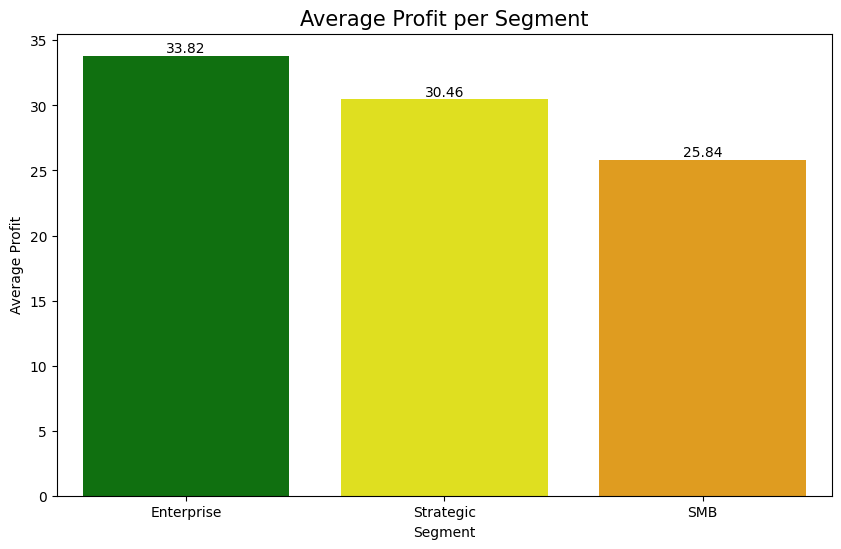

In [35]:
# Calculate average profit per segmen
segment_profit = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=segment_profit.index, y=segment_profit.values, palette=['green', 'yellow', 'orange'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{p.get_height():.2f}',
            ha='center', va='bottom')

plt.title('Average Profit per Segment', size = 15)
plt.xlabel('Segment')
plt.ylabel('Average Profit')
plt.show()

`Insight` : Berdasarkan visualisasi diatas ditemukan bahwa berdasarkan keuntungan yang didapatkan, segment bisnis Enterprise memiliki nilai yang paling tinggi. Hal ini menarik karena jika dikaitkan dengan jumlah total customer pada setiap segmen, bahwa segmen SMB (UKM) dengan jumlah pelanggan yang sangat banyak memiliki pengaruh terhadap rata - rata profit yang kecil. Sedangkan pengguna Enterprise dengan urutan pengguna yang paling sedikit memberikan rata - rata profit yang paling banyak.

## **Data Analysis by LRFM Segmentation**
Proses selanjutnya adalah melakukan analisis data terhadap durasi pengguna, waktu terakhir pembelian, jumlah pembelian, total pembelian menggunakan metode LRFM Analysis untuk mengetahui tingkah laku pembelian layanan (customer behaviour) sehingga bisa memberikan pembagian kelompok terhadap customer dan menyusun strategi bisnis berdasarkan kelompok segmentasi. Setiap nilai perhitungan LRFM akan dihubungkan dengan kolom `Customer`

#### **Calculate LRFM Value**

##### **Length and Recency Analysis**

Perhitungan untuk setiap aspek sebagai berikut : 

- Length akan mengukur durasi lama pelanggan dari awal pembelian pertama sekali dan perusahaan.
- Recency melihat lama durasi pelanggan terhadap transaksi terakhirnya. 

Disini menggunakan asumsi bahwa hari analisis diperoleh dari hari transaksi terakhir +1 bulan.

In [36]:
import datetime

# Rentang data yang digunakan
start_date = df['Order Date'].max()
end_date = df['Order Date'].min()
duration_date = start_date - end_date

# Asumsi waktu analisis dilakukan h+30 dari transaksi terakhir
analysis_date = df['Order Date'].max() + datetime.timedelta(days=30)
analysis_date

print(f'Waktu analisis diasumsikan dilakukan pada tanggal : {analysis_date}')
print(f'Dengan tanggal awal data analisis yang digunakan dari tanggal : {start_date}')
print(f'Dengan tanggal akhir data analisis yang digunakan dari tanggal : {end_date}')
print(f'Dengan durasi selama : {duration_date}')

Waktu analisis diasumsikan dilakukan pada tanggal : 2024-01-30 00:00:00
Dengan tanggal awal data analisis yang digunakan dari tanggal : 2023-12-31 00:00:00
Dengan tanggal akhir data analisis yang digunakan dari tanggal : 2020-01-04 00:00:00
Dengan durasi selama : 1457 days 00:00:00


In [37]:
##### **Length and Recency Calculation**

df_length_recency = df.groupby('Customer').agg(
    length=('Order Date', lambda x: (analysis_date - x.min()).days),
    recency=('Order Date', lambda x: (analysis_date - x.max()).days),
)

df_length_recency.sample(10, random_state=42)

,length,recency
Customer,,
Mondelez International,1455,32
General Electric,1448,35
Walgreens,1448,44
Boeing,1460,34
Walt Disney,1398,52
Sysco,1438,63
Nestle,1483,147
Glencore,1403,80
Anthem,1477,37


Dari segi **Length** (lama menjadi pelanggan), dapat terlihat bahwa customer Mondelez International memiliki length yang cukup tinggi, yaitu 1455 hari sedangkan customer Nestle baru bergabung selama 1483 hari. Dari segi recency, dapat dilihat bahwa customer Mondelez International memiliki recency yang tergolong kecil yaitu 32 hari, sedangkan customer Nestle memiliki nilai recency yang cukup besar yaitu 147 hari, artinya customer ini sudah lama tidak bertransaksi lagi. 

Dapat dilihat bahwa terdapat 2 kondisi yang berbeda oleh tiap pengguna layanan tersebut, sehingga analisis LRFM dapat membantu dalam membagi kelompok pengguna yang dapat berguna untuk strategi penjualan perusahaan.

##### **Frequency Analysis**

Tujuannya ingin mengetahui seberapa sering customer melakukan transaksi selama menjadi pelanggan yang dilihat dari jumlah pemesanan.

Perhitungan untuk setiap aspek sebagai berikut : 

- Total banyaknya pengguna / perusahaan menggunakan layanan selama menjadi pelanggan yang dilihat dari jumlah pesanan Order ID

Disini kolom Order ID akan dikaitkan dengan kolom Customer

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Country      9994 non-null   object        
 3   City         9994 non-null   object        
 4   Region       9994 non-null   object        
 5   Subregion    9994 non-null   object        
 6   Customer     9994 non-null   object        
 7   Customer ID  9994 non-null   object        
 8   Industry     9994 non-null   object        
 9   Segment      9994 non-null   object        
 10  Product      9994 non-null   object        
 11  License      9994 non-null   object        
 12  Sales        9994 non-null   float64       
 13  Quantity     9994 non-null   int64         
 14  Discount     9994 non-null   float64       
 15  Profit       9994 non-null   float64       
dtypes: dat

In [39]:
# Perhitungan banyaknya jumlah pembelian layanan berdasarkan kolom Order ID
df_frequency = df.groupby('Customer').agg(
    frequency=('Order ID', lambda x: x.nunique())
)

df_frequency.sample(5, random_state=42)

,frequency
Customer,
Mondelez International,61
General Electric,22
Walgreens,33
Boeing,49
Walt Disney,53


Kita mengetahui bahwa customer Mondelez International sudah lama menjadi pelanggan dan frekuensinya juga cukup banyak melakukan transaksi sebanyak 61 kali pemesanan. Sedangkan jika dibandingkan customer General Electric yang sudah lama juga menjadi pelanggan, frekuensinya termasuk sedikit melakukan transaksi sebanyak 22 kali.

##### **Monetary Analysis**

Tujuannya ingin mengetahui jumlah keuntungan (sales) yang dihasilkan selama pengguna menggunakan layanan.

Perhitungan untuk setiap aspek sebagai berikut : 

- Total banyaknya keuntungan pengguna / perusahaan menggunakan layanan selama menjadi pelanggan yang dilihat dari jumlah Profit

Perhitungan monetary menggunakan kolom `Profit` karena tujuannya ingin mengetahui pelanggan yang paling menguntungkan, bukan hanya volume penjualannya saja sehingga dapat dilakukan penyusunan strategi terkait efisiensi, profitabilitas.

In [40]:
# Perhitungan jumlah profit masing - masing customer 
df_monetary = df.groupby('Customer').agg(
    monetary=('Profit', 'sum'),
)

df_monetary.sample(5, random_state=42)

,monetary
Customer,
Mondelez International,8577.6524
General Electric,687.1512
Walgreens,-740.6747
Boeing,666.5414
Walt Disney,5786.8297


Dapat dilihat bahwa customer Mondelez International telah memberikan profit sebesar 8577 dollar dari 61 kali transaksi yang dilakukan. Sedangkan customer Walgreens memberikan profit yang negatif, artinya bahwa dari penjualan malah menghasilkan kerugian sebesar 740.67 dollar. Hal ini bisa dipengaruhi oleh banyak hal, salah satunya adalah nilai diskon yang terlalu besar. Namun untuk lebih jelasnya perlu dilakukan analisis berbeda untuk mengetahui penyebabnya.

Langkah selanjutnya adalah menggabungkan tiap tabel Length, Recency, Frequency, dan Monetary menjadi satu tabel yang sama sehingga memudahkan dalam memberikan skor dan mengelompokkannya.

In [41]:
# Penggabungan setiap tabel LRFM
df_customer = pd.concat([df_length_recency, df_frequency, df_monetary], axis=1, join='inner')
df_customer = df_customer.round({'monetary': 2})
df_customer.sample(15)

,length,recency,frequency,monetary
Customer,,,,
Siemens,1487,73,86,6519.51
Walgreens,1448,44,33,-740.67
Allstate,1441,31,61,-2796.29
Boeing,1460,34,49,666.54
Humana,1365,35,37,2581.92
CVS Health,1486,46,61,4181.26
Gazprom,1270,73,23,-13.97
UnitedHealth Group,1445,32,57,4876.58
Engie,1472,57,54,1159.38


In [42]:
df_customer.describe()

,length,recency,frequency,monetary
count,99.000000,99.000000,99.000000,99.000000
mean,1416.858586,49.343434,50.595960,2892.899394
std,57.573734,30.589835,17.537667,2473.043425
min,1228.000000,30.000000,13.000000,-2796.290000
25%,1395.000000,34.500000,38.500000,1183.345000
50%,1428.000000,39.000000,52.000000,2579.160000
75%,1462.500000,52.000000,60.000000,4483.240000
max,1487.000000,269.000000,103.000000,10308.630000


#### **Assigning Score**

Dalam penentuan skor, kita akan menggunakan aturan sebagai berikut : 

- Ruled Based : *Recency*
- Statistical Approach : *Length*, *Frequency*, *Monetary*

Recency menggunakan sistem ruled based karena asumsi pembelian layanan merupakan subscription based yaitu per bulan/per tahun dengan menggunakan asumsi bulanan. Untuk pembagian sistem skor nya akan dijelaskan lebih lanjut pada masing - masing bagian.

##### **Length Segmentation**

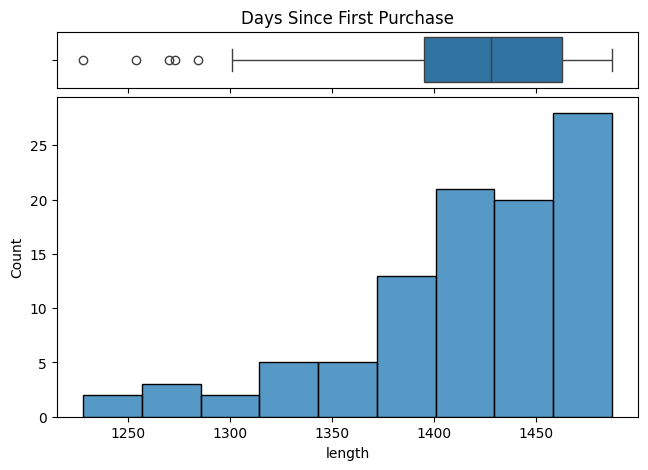

0.00    1228.0
0.25    1395.0
0.50    1428.0
0.75    1462.5
1.00    1487.0
Name: length, dtype: float64

In [43]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='length', ax=ax_top)
sns.histplot(data=df_customer, x='length', ax=ax_bot)

ax_top.set(
    title='Days Since First Purchase'
)

plt.show()
display(df_customer['length'].quantile([0, 0.25, 0.5, 0.75, 1]))


Data distribusi durasi pelanggan tersebut termasuk dalam rentang yang cukup banyak dengan batas.

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan length-nya ke dalam 4 kelompok yaitu :
- 4 (Strategic) : telah bergabung lebih dari 1463 hari
- 3 (Loyal) : telah bergabung antara 1429 hingga 1462 hari terakhir
- 2 (Retained) : telah bergabung antara 1396 hingga 1428 hari terakhir
- 1 (Developing) : baru bergabung antara 1 hingga 1395 hari terakhir

In [44]:
df_customer['l_score'] = pd.qcut(
    df_customer['length'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score
Customer,,,,,
Mondelez International,1455,32,61,8577.65,3
General Electric,1448,35,22,687.15,3
Walgreens,1448,44,33,-740.67,3
Boeing,1460,34,49,666.54,3
Walt Disney,1398,52,53,5786.83,2


##### **Recency Segmentation**

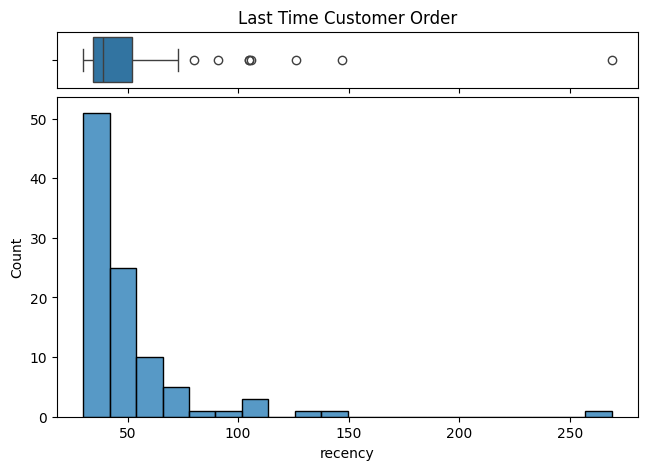

0.00     30.0
0.25     34.5
0.50     39.0
0.75     52.0
1.00    269.0
Name: recency, dtype: float64

In [45]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='recency', ax=ax_top)
sns.histplot(data=df_customer, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order'
)

plt.show()
display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, akan dikelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Highly Enganged) : melakukan transaksi kurang dari 30 hari terakhir
- 3 (Enganged) : melakukan transaksi antara 30 hingga 60 hari terakhir
- 2 (At-Risk) : melakukan transaksi antara 60 hingga 90 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 90 hari terakhir

In [46]:
def r_score(x):
    if x<=30:
        return 4                    # data
    elif x <= 60:                    # dibagi menjadi 4 kelompok sama banyak
        return 3                    # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
    elif x <= 90:
        return 2
    else:
        return 1
    
df_customer['r_score'] = df_customer['recency'].apply(r_score)
df_customer.sample(20, random_state=42)


,length,recency,frequency,monetary,l_score,r_score
Customer,,,,,,
Mondelez International,1455,32,61,8577.65,3,3
General Electric,1448,35,22,687.15,3,3
Walgreens,1448,44,33,-740.67,3,3
Boeing,1460,34,49,666.54,3,3
Walt Disney,1398,52,53,5786.83,2,3
Sysco,1438,63,40,3383.37,3,2
Nestle,1483,147,54,2110.45,4,1
Glencore,1403,80,26,4470.15,2,2
Anthem,1477,37,58,5953.20,4,3


##### **Frequency Segmentation**

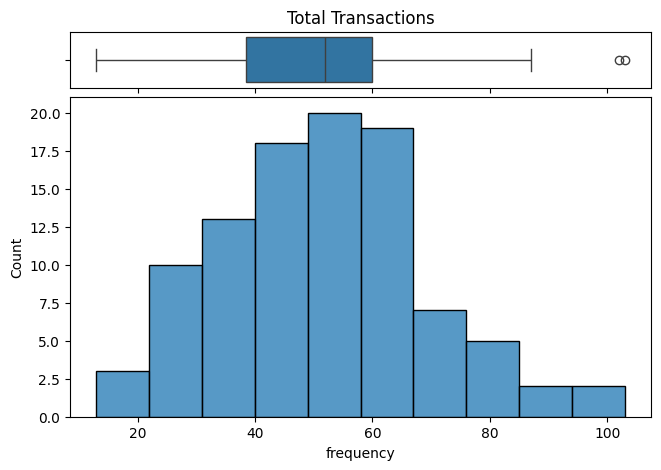

0.00     13.0
0.25     38.5
0.50     52.0
0.75     60.0
1.00    103.0
Name: frequency, dtype: float64

In [47]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions'
)

plt.show()
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan frequency-nya ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Frequent) : melakukan transaki lebih dari 60 kali
- 3 (Regular) : melakukan transaksi 53 hingga 60 kali
- 2 (Casual) : melakukan transaksi 39 hingga 52 kali
- 1 (Inregular) : melakukan transaksi dibawah 39 kali.

In [48]:
df_customer.sample(5, random_state=42)

df_customer['f_score'] = pd.qcut(
    df_customer['frequency'],           # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)


,length,recency,frequency,monetary,l_score,r_score,f_score
Customer,,,,,,,
Mondelez International,1455,32,61,8577.65,3,3,4
General Electric,1448,35,22,687.15,3,3,1
Walgreens,1448,44,33,-740.67,3,3,1
Boeing,1460,34,49,666.54,3,3,2
Walt Disney,1398,52,53,5786.83,2,3,3


##### **Monetary Segmentation**

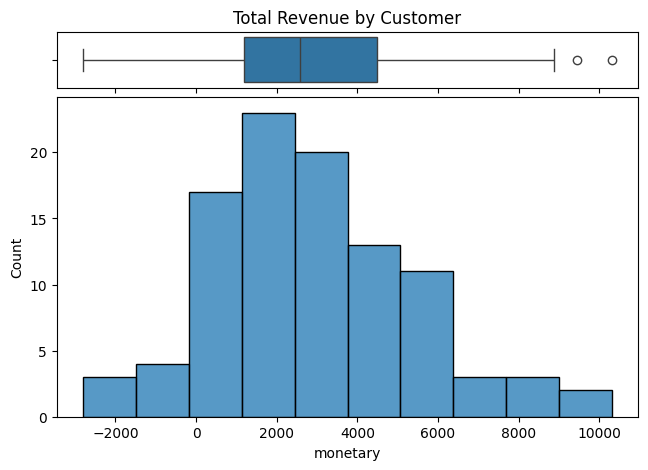

0.00    -2796.290
0.25     1183.345
0.50     2579.160
0.75     4483.240
1.00    10308.630
Name: monetary, dtype: float64

In [49]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='monetary', ax=ax_top)
sns.histplot(data=df_customer, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Value) : melakukan transaksi lebih dari 4483.24 dollar
- 3 (High Value) : melakukan transaksi antara 2579.16 hingga 4483.24 dollar
- 2 (Medium Value) : melakukan transaksi antara 1183.34 hingga 2579.16 dollar
- 1 (Low Value) : melakukan transaksi kurang dari dari 1183.34 dollar

In [50]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],            # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)


,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
Customer,,,,,,,,
Mondelez International,1455,32,61,8577.65,3,3,4,4
General Electric,1448,35,22,687.15,3,3,1,1
Walgreens,1448,44,33,-740.67,3,3,1,1
Boeing,1460,34,49,666.54,3,3,2,1
Walt Disney,1398,52,53,5786.83,2,3,3,4


#### **Labelling Segment**

Langkah selanjutnya dalam analisis LRFM adalah melakukan labelling dari tiap segmen sehingga kita bisa mengelompokkan behaviour customer berdasarkan nilai LRFM yang sudah kita dapatkan

Kita akan menggunakan metode **Combining Individual Score Approach** sehingga metode ini akan memberikan segmentasi yang spesifik berdasarkan hasil individu nilai LRFM nya sehingga cocok untuk penentuan strategi per masing customer

##### **Combining Individual Score Approach**

In [51]:
## Menggabungkan tabel dari setiap kolom score LRFM menjadi tabel utama
df_customer['lrfm_score_combined'] = df_customer['l_score'].astype(str) + df_customer['r_score'].astype(str) + df_customer['f_score'].astype(str) + df_customer['m_score'].astype(str)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined
Customer,,,,,,,,,
Mondelez International,1455,32,61,8577.65,3,3,4,4,3344
General Electric,1448,35,22,687.15,3,3,1,1,3311
Walgreens,1448,44,33,-740.67,3,3,1,1,3311
Boeing,1460,34,49,666.54,3,3,2,1,3321
Walt Disney,1398,52,53,5786.83,2,3,3,4,2334


Rentang L untuk pembagian kelompok hanya dikelompokkan sebagai rentang 1 - 4 saja karena untuk nilai min length dan max length berada pada rentang 1228 dan 1487 yang artinya setiap pelanggan sudah termasuk pelanggan yang cukup lama menggunakan layanan dan bukan termasuk pelanggan yang baru.

Lalu kita akan kelompokkan kedalam 4 segmen dengan ketentuan berikut:

In [71]:
seg_map = {
    r'[1-4][1-2][1-2][1-2]': 'Low Momentum Low Value', # Customer yang kemungkinan churn, jarang bertransaksi dan keuntungannya kecil
    r'[1-4][1-2][1-4][3-4]': 'Lost High Value Users', # Customer yang kemungkinan churn namun keuntungannya besar
    r'[1-4][3-4][1-4][1-2]': 'High Momentum Low Value', # Customer yang sering bertransaksi namun keuntungannya kecil
    r'[1-4][1-2][3-4][1-2]': 'Fading Frequent User', # Customer yang kemungkinan churn dan sering bertransaksi namun keuntungannya kecil
    r'[1-4][3-4][1-2][1-4]': 'Potential Loyal Cust', # Customer yang cukup loyal namun keuntungannya kecil dan bisa meningkat
    r'[1-4][3-4][3-4][3-4]': 'Top Priority Cust', # Customer yang loyal dan bertransaksi dengan keuntungan besar
}
    
df_customer['lrfm_segment_combined'] = df_customer['lrfm_score_combined'].replace(seg_map, regex=True)
df_customer.sample(99, random_state=42)

,Customer,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
62,Mondelez International,1455,32,61,8577.65,3,3,4,4,3344,Top Priority Cust
40,General Electric,1448,35,22,687.15,3,3,1,1,3311,High Momentum Low Value
95,Walgreens,1448,44,33,-740.67,3,3,1,1,3311,High Momentum Low Value
18,Boeing,1460,34,49,666.54,3,3,2,1,3321,High Momentum Low Value
97,Walt Disney,1398,52,53,5786.83,2,3,3,4,2334,Top Priority Cust
...,...,...,...,...,...,...,...,...,...,...,...
60,Microsoft,1228,35,32,2501.43,1,3,1,2,1312,High Momentum Low Value
71,Petrobras,1333,59,26,184.10,1,3,1,1,1311,High Momentum Low Value
14,BNP Paribas,1392,32,81,5550.81,1,3,4,4,1344,Top Priority Cust
92,Valero Energy,1413,45,58,10308.63,2,3,3,4,2334,Top Priority Cust


In [72]:
customer_segment = df_customer['lrfm_segment_combined'].unique()
customer_segment = pd.DataFrame(customer_segment, columns=['Segment'])

# Tampilkan tanpa index
print("Terdapat beberapa pengelompokkan segmentasi customer berdasarkan nilai LRFM sebagai berikut:")
print(customer_segment.to_string(index=False))

# Tampilkan total unik
print(f'\nTotal pengelompokkan ada {customer_segment["Segment"].nunique()} kelompok')

Terdapat beberapa pengelompokkan segmentasi customer berdasarkan nilai LRFM sebagai berikut:
                Segment
      Top Priority Cust
High Momentum Low Value
   Potential Loyal Cust
  Lost High Value Users
 Low Momentum Low Value
   Fading Frequent User

Total pengelompokkan ada 6 kelompok


In [74]:
count_missing_segment = df_customer['lrfm_segment_combined'].isnull().sum()

if customer_segment is None:
    print(f'Terdapat {count_missing_segment} tabel yang tidak memiliki segmentasi')
else:
    print(f'Seluruh tabel memiliki kelompok segmentasinya')
    print(f'Jumlah tabel yang tidak memiliki kelompok : {count_missing_segment}')


Seluruh tabel memiliki kelompok segmentasinya
Jumlah tabel yang tidak memiliki kelompok : 0


##### **Heatmap Visualization**

Kita akan coba tampilkan karakteristik dari setiap segment dalam bentuk visualisasi sebagai berikut:

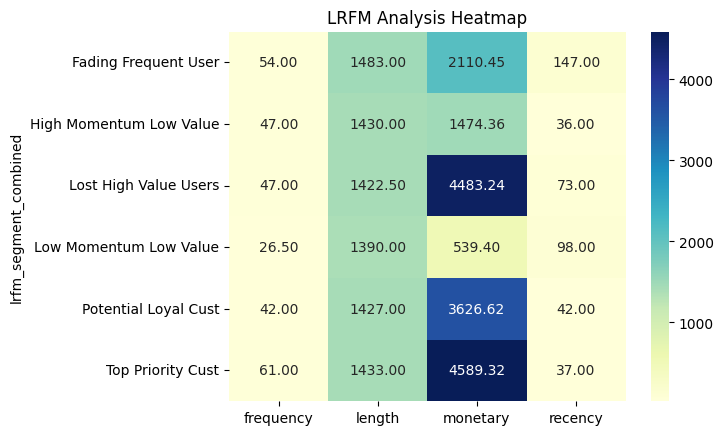

In [75]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_combined', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [76]:
import plotly.express as px

color_map = {
    'Low Momentum Low Value' : 'gray',
    'Lost High Value Users' : 'purple', 
    'High Momentum Low Value' : 'pink', 
    'Fading Frequent User' : 'blue', 
    'Potential Loyal Cust' : 'green', 
    'Top Priority Cust' : 'yellow', 
    'Potential Value Cust' : 'orange',
}

fig = px.scatter_3d(
    df_customer, 
    x='recency', 
    y='frequency', 
    z='monetary',
    color='lrfm_segment_combined', 
    color_discrete_map=color_map, 
)
                          
fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "LRFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

##### **Total Customer per Segmentation**

Melihat banyaknya jumlah pelanggan yang sudah dibagikan menjadi kelompok segmentasi berdasarkan nilai LRFM sehingga mengetahui proporsi pelanggan

In [57]:
df_customer.reset_index(inplace=True)

In [77]:
df_customer

,Customer,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
0,AT&T,1420,39,67,4520.66,2,3,4,4,2344,Top Priority Cust
1,Abbott Laboratories,1385,42,31,2281.74,1,3,1,2,1312,High Momentum Low Value
2,Aetna,1400,51,76,3312.67,2,3,4,3,2343,Top Priority Cust
3,Airbus,1480,57,58,5593.37,4,3,3,4,4334,Top Priority Cust
4,Allianz,1414,31,102,5531.88,2,3,4,4,2344,Top Priority Cust
...,...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,1453,51,65,4546.19,3,3,4,4,3344,Top Priority Cust
95,Walgreens,1448,44,33,-740.67,3,3,1,1,3311,High Momentum Low Value
96,Walmart,1427,50,46,3111.13,2,3,2,3,2323,Potential Loyal Cust
97,Walt Disney,1398,52,53,5786.83,2,3,3,4,2334,Top Priority Cust


In [91]:
lrfm_customer = df_customer.groupby('lrfm_segment_combined')['Customer'].count().sort_values(ascending=False)
lrfm_customer

lrfm_segment_combined
High Momentum Low Value    41
Top Priority Cust          30
Potential Loyal Cust       13
Low Momentum Low Value      8
Lost High Value Users       6
Fading Frequent User        1
Name: Customer, dtype: int64

`Insight` : Jumlah pelanggan terbanyak adalah High Momentum Low Value yang artinya masih banyak pelanggan yang sering menggunakan layanan namun jumlah transaksi yang tergolong sedikit, dan disusul dengan Top Priority Cust menunjukkan bahwa sudah ada beberapa pelanggan yang memang cukup berpengaruh serta loyal terhadap profit perusahaan. Untuk masing - masing proporsi 

#### **Summary and Recommendation**

Langkah selanjutnya dalam analisis LRFM adalah memberikan kesimpulan dan analisis serta temuan dari pengelompokkan customer tersebut dan memberikan rekomendasi terkait langkah selanjutnya menggunakan strategi yang spesifik untuk masing - masing pembagiannya.



##### **Summary**

Terdapat beberapa kesimpulan yang dapat dibuat yaitu : 
- Sebagian besar pelanggan berada dalam kategori length yang cukup tinggi (Loyal) > 1000 hari, namun tidak seluruhnya pelanggan menunjukkan aktivitas yang terkini (Recency rendah) hal ini menunjukkan bahwa ada kemungkinan pelanggan yang tidak bertransaksi dalam waktu dekat dan berpotensi menjadi churn

- Recency dan Frequency menjadi keterlibatan aktif dalam keberlangsungan perusahaan, namun harus diperhatikan aspek monetary nya yang berbanding lurus atau tidak terhadap aktivitas. Terdapat pelanggan yang memiliki monetary tinggi namun recency rendah menunjukkan bahwa mereka pernah menyumbangkan profit yang tinggi namun tidak aktif lagi. Dalam perhitungan profit perlu memperhatikan aspek yang mempengaruhi nilainya, salah satunya diskon.

- Terdapat 6 kategori pengelompokkan segmentasi menggunakan analisis LRFM dengan masing - masing klasifikasinya sebagai berikut : Potential Loyal Cust, High Momentum Low Value, Top Priority Cust, Fading Frequent User, Lost High Value Users, Low Momentum Low Value


##### **Rekomendasi**

- Penyesuaian strategi berdasarkan setiap segmen : 
    - Top Priority Customer : Memberikan loyalty rewards, fitur eksklusif dan early access fitur baru dengan menggunakan sistem member point
    - Lost High Value User : Melakukan survey/feedback identifikasi penyebab churn dan memberikan solusi melalui penawaran produk baru dengan konsultasi gratis terkait permasalahan pengguna 
    - Low Momentum Low Value : Memberikan uji coba gratis selama 14 hari serta penawaran diskon langganan dan produk bundling serta menawarkan pendaftaran member
    - Potential Loyal Customer : Memberikan promosi fitur layanan lainnya yang masih berhubungan dengan produk yang mereka gunakan dan informasi kegunaan produk dengan video edukasi serta sistem 3 months promo
    - High Momentum Low Value : Menawarkan promosi personal, produk berkaitan, fungsi referral, paket bundling
    - Fading Frequent User : Menawarkan paket reactivation, pendekatan personal / follow up terkait kendala atau hambatan menggunakan layanan.

## **Data Finalization**
Proses selanjutnya adalah melakukan penggabungan dan penyimpanan data dalam bentuk format sesuai yang dibutuhkan agar dapat melakukan visualiasi melalui program Tableau

In [86]:
merged_df = pd.merge(df, df_customer, on='Customer', how='left')
merged_df.describe()

,Order Date,Sales,Quantity,Discount,Profit,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896,1423.670002,45.872524,56.438963,3242.161130,2.601661,2.879828,2.837002,2.689214
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000,1228.000000,30.000000,13.000000,-2796.290000,1.000000,1.000000,1.000000,1.000000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750,1401.000000,33.000000,42.000000,1690.580000,2.000000,3.000000,2.000000,2.000000
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500,1430.000000,38.000000,57.000000,2828.750000,3.000000,3.000000,3.000000,3.000000
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000,1467.000000,51.000000,65.000000,4676.080000,4.000000,3.000000,4.000000,4.000000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000,1487.000000,269.000000,103.000000,10308.630000,4.000000,4.000000,4.000000,4.000000
std,NaN,623.245101,2.225110,0.206452,234.260108,53.144757,22.591153,17.421325,2455.242388,1.103074,0.545230,1.067495,1.102143


In [88]:
merged_df.dtypes

Order ID                         object
Order Date               datetime64[ns]
Country                          object
City                             object
Region                           object
Subregion                        object
Customer                         object
Customer ID                      object
Industry                         object
Segment                          object
Product                          object
License                          object
Sales                           float64
Quantity                          int64
Discount                        float64
Profit                          float64
length                            int64
recency                           int64
frequency                         int64
monetary                        float64
l_score                           int64
r_score                           int64
f_score                           int64
m_score                           int64
lrfm_score_combined              object


Melakukan upload data menggunakan format csv atau xlsx untuk divisualisasikan

In [90]:
# Csv

merged_df.to_csv('Data Bersih',index=False)

# Excel

merged_df.to_excel('Data Bersih.xlsx', sheet_name='Sheet1')